In [1]:
import re
import nltk
!pip install spacy
!pip install gensim
import spacy
import warnings
import nltk.data
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from nltk.corpus import stopwords
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from gensim.utils import simple_preprocess
from gensim.models import word2vec, KeyedVectors
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
nlp = spacy.load("en_core_web_sm")
nltk.download('punkt')
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
orange, purple, elm, grey ='#FFCC00', '#666599', '#217C7E', '#F5F5F5'

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passi

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
database = pd.read_csv('data/complete_data.csv',index_col=0)
data_aa = database[database['race']=='black']
data_wa = database[database['race']=='white']

In [ ]:
database

# Individual-level frequently mentioned words

In [13]:
def clean_stem(text, join=0):

    no_cite = re.sub('>.*','',text)

    no_url = re.sub(r"http\S+", '', no_cite)

    review_text = BeautifulSoup(no_url).get_text()

    doc = nlp(review_text)
    
    #Remove non-letters
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    
    #Convert to lower case and split
    words = letters_only.lower().split()
    
    #Covert stop words to a set
    stops = set(stopwords.words("english"))
    
    #Remove stopwords
    meaningful_words = [w for w in words if not w in stops]
    results = []
    for i in meaningful_words:
        if len(i) > 3:
            stemmed_token = lemmatize_stemming(i)
            stemmed_to_original[stemmed_token] = i
            results.append(stemmed_token)

    return results

In [21]:
stemmer = SnowballStemmer("english")
stemmed_to_original = {}

## Basic Preprocessings Functions ##
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def find_keywords(corpus):

    news_data = []
    for i in tqdm_notebook(corpus):
        news_data.append(clean_stem(i))
    ## notice, min_df and max_df parameters are really important in getting the most important keywords out of your corpus
    vectorizer = TfidfVectorizer(min_df = 20 , max_df = 0.72, tokenizer= lambda x : x , lowercase= False)
    vectorizer.fit_transform(news_data)

    ## get idf values of all the corresponding tokens used by vectorizer and sort them in ascending order
    word_to_idf = {i:j for i,j in zip(vectorizer.get_feature_names() , vectorizer.idf_ )}
    ## sort the dictionairy in ascending order of idf weights
    word_to_idf = sorted(word_to_idf.items() ,key = lambda x : x[1],  reverse = False)

    return word_to_idf

In [22]:
print('for all authors data')
comments = list(database['body'])
all_key = find_keywords(comments)

print('for african american authors data')
comments = list(data_aa['body'])
black_key = find_keywords(comments)

print('for white american authors data')
comments = list(data_wa['body'])
white_key = find_keywords(comments)

for all authors data



for african american authors data



for white american authors data


In [28]:
for k,v in all_key[:100]:
    print('{} ---> {}'.format(stemmed_to_original[k], v))

like ---> 2.997217890865083
people ---> 3.3864322651834975
want ---> 3.7773764484146577
would ---> 3.8697782403230256
area ---> 4.163610194594934
city ---> 4.189927502912308
life ---> 4.207412817253328
times ---> 4.280581871180439
place ---> 4.311718559966231
work ---> 4.383512251984973
really ---> 4.419760042377314
world ---> 4.440099726614437
year ---> 4.476721081302974
know ---> 4.500082431216148
house ---> 4.558096826276776
thinking ---> 4.599400632418011
still ---> 4.653021723857108
also ---> 4.683131525328479
even ---> 4.68531731854846
near ---> 4.70297782170041
make ---> 4.725501296367493
could ---> 4.796285553399862
going ---> 4.803647549840932
good ---> 4.83364980014473
country ---> 4.841293149457298
used ---> 4.929467723041964
well ---> 4.960675929495805
right ---> 4.978118232159147
much ---> 5.01698710105852
looking ---> 5.04480960665782
without ---> 5.04480960665782
many ---> 5.047949326662487
long ---> 5.07020779726343
state ---> 5.07020779726343
never ---> 5.0962679039332

In [26]:
for k,v in black_key[:100]:
    print('{} ---> {}'.format(stemmed_to_original[k], v))

like ---> 2.9484258736525604
people ---> 3.435193929046549
want ---> 3.8024634394166776
would ---> 3.8024634394166776
life ---> 4.0495602317533805
area ---> 4.213863283044656
times ---> 4.2595333198778444
place ---> 4.33724230420516
city ---> 4.4437257846076115
world ---> 4.4437257846076115
really ---> 4.455025339861544
make ---> 4.588556732486067
year ---> 4.614874040803441
work ---> 4.628297061135582
even ---> 4.64190271319136
thinking ---> 4.669682277298436
know ---> 4.683866912290392
still ---> 4.712854449163644
also ---> 4.773479070980079
much ---> 4.8052277692946594
country ---> 4.854824710434031
could ---> 4.871919143793331
going ---> 4.871919143793331
good ---> 4.889310886505201
without ---> 4.9070104636046015
right ---> 4.92502896910728
things ---> 4.943378107775477
house ---> 4.981118435758324
near ---> 5.020339148911605
loved ---> 5.040541856229124
used ---> 5.040541856229124
looking ---> 5.06116114343186
well ---> 5.06116114343186
long ---> 5.082214552629693
south ---> 5.08

In [27]:
for k,v in white_key[:100]:
    print('{} ---> {}'.format(stemmed_to_original[k], v))

like ---> 3.0058707010714274
people ---> 3.3772415978366155
want ---> 3.7719408440182205
would ---> 3.8813394384253272
city ---> 4.148803389420198
area ---> 4.153345410854699
life ---> 4.2371889592878915
times ---> 4.282766467784212
place ---> 4.3054748671540235
work ---> 4.343283150693963
really ---> 4.411620928806684
world ---> 4.43749301863228
year ---> 4.451706455882334
know ---> 4.4682016752514455
house ---> 4.4956006494395595
thinking ---> 4.584945749775409
still ---> 4.640181878250667
near ---> 4.652604398249224
also ---> 4.665183180456085
even ---> 4.690825611069423
make ---> 4.749666111092356
could ---> 4.780437769759109
going ---> 4.78899702315478
good ---> 4.821023049874188
country ---> 4.835926455376763
used ---> 4.907496647878014
well ---> 4.940286470701006
right ---> 4.984586729597585
many ---> 5.020051439169868
looking ---> 5.038266879061209
state ---> 5.045646986358832
much ---> 5.056820286956957
long ---> 5.064339119370985
never ---> 5.068119842210891
without ---> 5.06

In [8]:
transportaion = [3.016808236646075, 3.0227855407545343, 3.0233852409224324]
facilities = [3.7688681559055723, 4.253902000590637, 2.6610276138282107]
neighbor = [2.925732820757594, 3.467687212648181, 4.058659488789221]
transportaion_black = [2.888386304917127,3.028148247292285,3.133508762950112]
facilities_black = [2.8458266904983307,3.672505263682799]
neighbor_black = [3.133508762950112]
transportaion_white = [3.034263267826806, 3.1124280406761424, 3.149699435473374]
facilities_white = [2.7316555451583495, 3.917279210816089, 3.8815611282140097]
neighbor_white = [2.9106493118596295, 3.5301632413761213, 3.963799226450982]

## Visualization

In [29]:
x = np.arange(3)
orange, purple, elm, grey ='#FFCC00', '#666599', '#217C7E', '#F5F5F5'

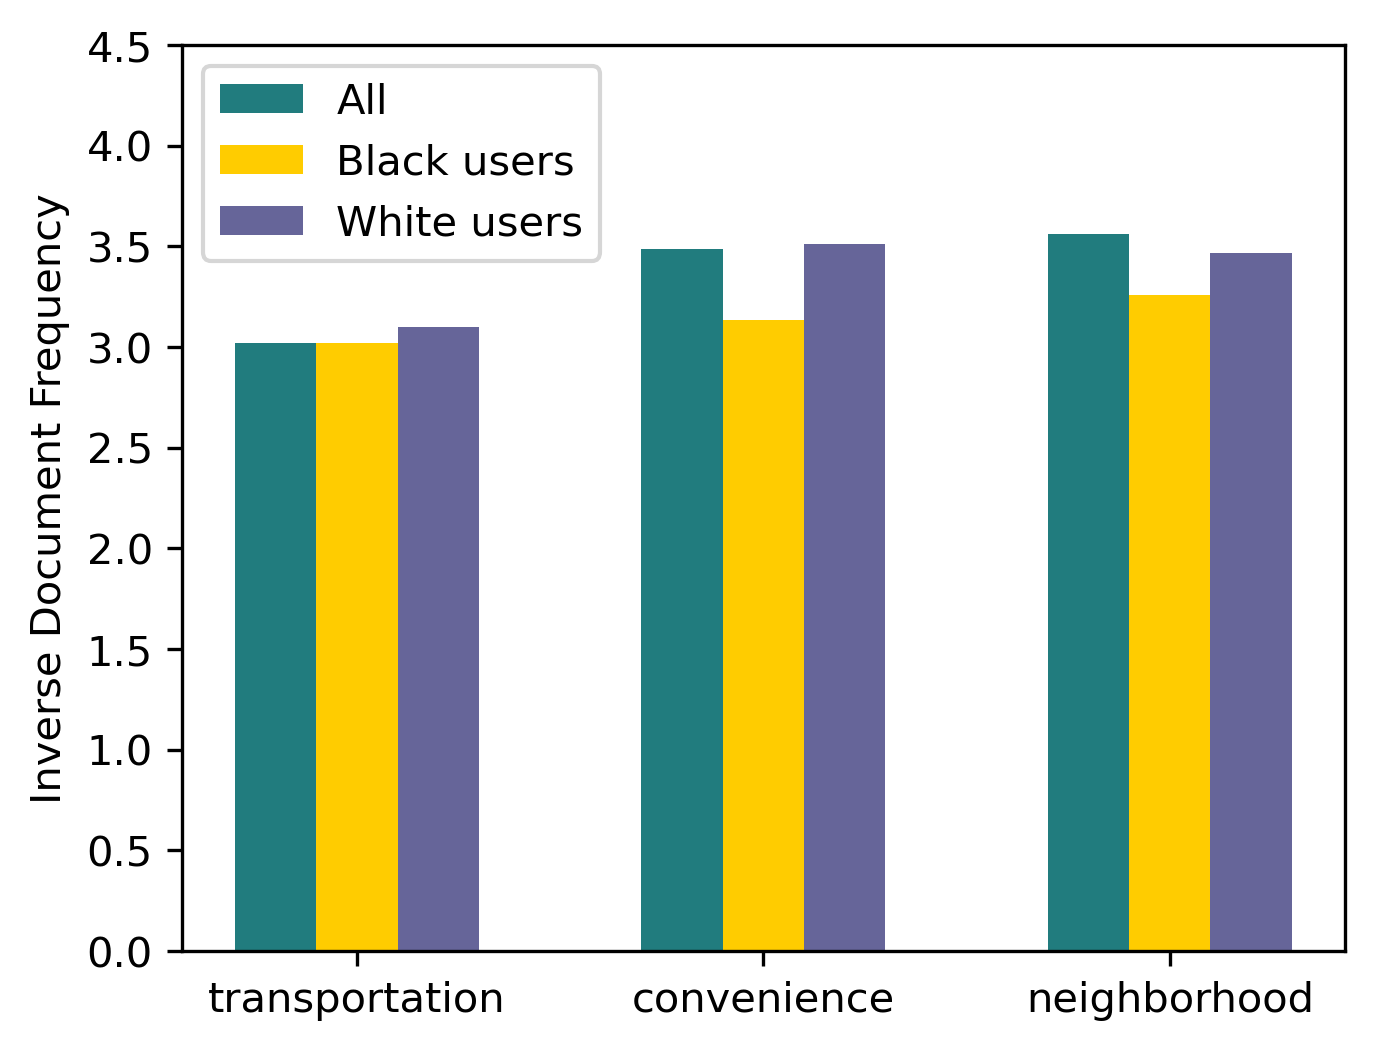

In [11]:
fig, ax = plt.subplots(figsize=(5,4), dpi=300)
plt.bar(x,[np.mean(transportaion),np.mean(neighbor),np.mean(facilities)],
        0.2, color=elm, label='All')
plt.bar(x+0.2,[np.mean(transportaion_black),np.mean(neighbor_black),np.mean(facilities_black)], 
        0.2, color=orange, label='Black users')
plt.bar(x+0.4,[np.mean(transportaion_white),np.mean(facilities_white),np.mean(neighbor_white)],
        0.2, color=purple,label = 'White users')
ax.set_ylim(0,4.5)
ax.set_ylabel('Inverse Document Frequency')
ax.set_xticks(x+0.2)
ax.set_xticklabels(['transportation', 'convenience', 'neighborhood'])
plt.legend(loc='best', fontsize=10)
plt.savefig('Attention.jpg')

# Groups of keywords and sentiment

In [30]:
import nltk.data
import pandas as pd
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from tqdm import tqdm_notebook

! pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

nltk.download('punkt')
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

     |████████████████████████████████| 125 kB 3.3 MB/s eta 0:00:01
You should consider upgrading via the '/Users/h/anaconda3/bin/python -m pip install --upgrade pip' command.


[nltk_data] Downloading package punkt to /Users/h/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [57]:
def clean(text, join=0):

    no_cite = re.sub('>.*','',text)

    no_url = re.sub(r"http\S+", '', no_cite)

    review_text = BeautifulSoup(no_url).get_text()
    
    #Remove non-letters
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    
    #Convert to lower case and split
    words = letters_only.lower().split()
    
    #Covert stop words to a set
    stops = set(stopwords.words("english"))
    
    #Remove stopwords
    meaningful_words = [w for w in words if not w in stops]
    
    #Join the words back into one string separated by space
    clean_text = meaningful_words
    if join:
        clean_text = " ".join(meaningful_words)

    return clean_text

In [50]:
def review_to_sentences(review: str, tokenizer: nltk.tokenize.punkt.PunktSentenceTokenizer):

    raw_sentences = tokenizer.tokenize(review.strip())

    review_sentences = []
    
    for raw_sentence in raw_sentences:
        # If a sentence is empty, skip it
        if len(raw_sentence) > 0:
            # Otherwise, call clean_review to get a list of words
            review_sentences.append(clean(raw_sentence))

    return review_sentences

In [61]:
def generate_z1(sentences,num_features,min_word_count,context,num_workers = 4,downsampling = 1e-3, model_name = "model1_100features_40minwords_5context"):

    trained_word2vec_model = word2vec.Word2Vec(sentences, workers=num_workers, 
            size=num_features, min_count = min_word_count, 
            window = context, sample = downsampling)
    
    trained_word2vec_model.init_sims(replace=True)

    trained_word2vec_model.save(model_name)

    z1 = trained_word2vec_model.wv.syn0

    word_list_z1 = trained_word2vec_model.wv.index2word

    return trained_word2vec_model, z1, word_list_z1

In [33]:
def fit_kmeans(z,word_list_z,num_clusters = 10):

    kmeans_clustering = KMeans( n_clusters = num_clusters )

    idx = kmeans_clustering.fit_predict(z)

    word_centroid_map_z = dict(zip(word_list_z, idx))

    return word_centroid_map_z

In [47]:
def print_clusters(word_centroid_map_z):

    clusters_list = {}    
    for cluster in range(0,max(word_centroid_map_z.values())+1):
        print ("\nCluster %d" %cluster)
        words = []
        values = list(word_centroid_map_z.values())
        keys = list(word_centroid_map_z.keys())
        for i in range(0,len(word_centroid_map_z.values())):
            if(values[i] == cluster):
                words.append(keys[i])
        if len(words) > 20:
            out = 20
        else:
            out = len(words)
        print(words[:out])
        clusters_list[cluster]=words
        
    return clusters_list  

In [53]:
sentences = [] 

for review in database['body']:
    sentences += review_to_sentences(review, tokenizer)

In [ ]:
num_features = 1000
min_word_count = 40
context = 5

model1, z1, word_list_z1 = generate_z1(sentences,num_features,min_word_count,context)
word_centroid_map_z1 = fit_kmeans(z1, word_list_z1, 10)
clusters = print_clusters(word_centroid_map_z1, "model1")

In [ ]:
sentences = database['body']
comments = []

n = 0
for sentence in sentences:
    n+=1
    no_cite = re.sub('>.*','',sentence)
    no_url = re.sub(r"http\S+", '', no_cite)
    review_text = BeautifulSoup(no_url).get_text()

    vader_score = analyzer.polarity_scores(sentence)
    if vs['neg']>0.1 or vs['pos']>0.1:
        comments.append(sentence)

In [ ]:
commute,facility,house,neighbor = [],[],[],[]
com_cluster = clusters[3][:50]
fac_cluster = clusters[0][:50]
hou_cluster = clusters[8][:50]
nei_cluster = clusters[6][:50]

for i in comments:
    num_com,num_fac,num_hou,num_nei = 0,0,0,0
    for c in com_cluster:
        if c in i: 
            num_com+=1
    for f in fac_cluster:
        if f in i: 
            num_fac+=1
    for h in hou_cluster:
        if h in i: 
            num_hou+=1
    for n in nei_cluster:
        if n in i: 
            num_nei+=1

    commute.append(num_com)
    facility.append(num_fac)
    house.append(num_hou)
    neighbor.append(num_nei)

In [ ]:
commute = np.array(commute)/max(commute)
facility = np.array(facility)/max(facility)
house = np.array(house)/max(house)
neighbor = np.array(neighbor)/max(neighbor)

In [ ]:
database['com']=commute
database['fac']=facility
database['hou']=house
database['nei']=neighbor

## Visualization

In [ ]:
metrics = [commute, facility, house, neighbor]
met_name = ['com','fac','hou','nei']
metrics_dict = []
for idx in range(4):
    i = metrics[idx]
    mn = met_name[idx]
    dict_data = {}
    unique_value = list(set(i))
    for v in unique_value:
        dict_data[v]=np.mean(database[database[mn]==v]['pos'])
    metrics_dict.append(dict_data)    

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharey=False, dpi=200)
names = ['Commute','Facility','House condition','Neighborhood']
for i in range(4):
    ax1 = axes[int(i/2),i%2]
    ks = []
    vvs = []
    for k,v in metrics_dict[i].items():
        ks.append(k)
        vvs.append(v)
    m, b = np.polyfit(ks, vvs, 1)
    ax1.scatter(ks,vvs,c=purple)
    ax1.plot(np.array(ks), m*np.array(ks) + b, c=orange)
    ax1.set_title(names[i],fontsize=12)
    plt.sca(ax1)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    if int(i/2) != 0:
        ax1.set_xlabel('Scaled Frequency',size=12)
    if i%2 == 0:
        ax1.set_ylabel('Sentiment Score (positive)',size=12)
plt.savefig('pos.jpg')

In [ ]:
metrics = [commute, facility, house, neighbor]
met_name = ['com','fac','hou','nei']
metrics_dict = []
for idx in range(4):
    i = metrics[idx]
    mn = met_name[idx]
    dict_data = {}
    unique_value = list(set(i))
    for v in unique_value:
        dict_data[v]=np.mean(database[database[mn]==v]['neg'])
    metrics_dict.append(dict_data)    

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharey=False, dpi=200)
names = ['Commute','Facility','House condition','Neighborhood']
for i in range(4):
    ax1 = axes[int(i/2),i%2]
    ks = []
    vvs = []
    for k,v in metrics_dict[i].items():
        ks.append(k)
        vvs.append(v)
    m, b = np.polyfit(ks, vvs, 1)
    ax1.scatter(ks,vvs,c=purple)
    ax1.plot(np.array(ks), m*np.array(ks) + b, c=orange)
    ax1.set_title(names[i],fontsize=12)
    plt.sca(ax1)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    if int(i/2) != 0:
        ax1.set_xlabel('Scaled Frequency',size=12)
    if i%2 == 0:
        ax1.set_ylabel('Sentiment Score (negative)',size=12)
plt.savefig('neg.jpg')

In [ ]:
metrics = [commute, facility, house, neighbor]
met_name = ['com','fac','hou','nei']
metrics_dict = []
for idx in range(4):
    i = metrics[idx]
    mn = met_name[idx]
    dict_data = {}
    unique_value = list(set(i))
    for v in unique_value:
        dict_data[v]=np.mean(database[database[mn]==v]['neu'])
    metrics_dict.append(dict_data)    

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharey=False, dpi=200)
names = ['Commute','Facility','House condition','Neighborhood']
for i in range(4):
    ax1 = axes[int(i/2),i%2]
    ks = []
    vvs = []
    for k,v in metrics_dict[i].items():
        ks.append(k)
        vvs.append(v)
    m, b = np.polyfit(ks, vvs, 1)
    ax1.scatter(ks,vvs,c=purple)
    ax1.plot(np.array(ks), m*np.array(ks) + b, c=orange)
    ax1.set_title(names[i],fontsize=12)
    plt.sca(ax1)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    if int(i/2) != 0:
        ax1.set_xlabel('Scaled Frequency',size=12)
    if i%2 == 0:
        ax1.set_ylabel('Sentiment Score (neutrality)',size=12)
plt.savefig('neu.jpg')